In [16]:
import metamol as meta
from metamol.lib.fragments.monomers import Monomer
from metamol.lib.molecules.polymer import Polymer

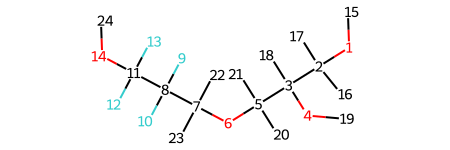

In [17]:
#构建PFPE(全氟聚醚)润滑剂分子
#头基团
headgroup = meta.Molecule('OCC(O)COCC(F)(F)C(F)(F)O', smiles=True)
headgroup.draw()

O13  is underbonded!
O13  is underbonded!


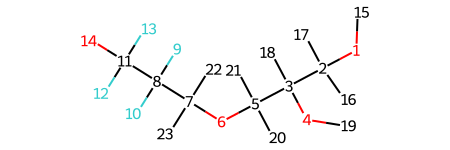

In [18]:
#将第14号O原子标记为连接点(tail), 并移除24号H原子(remove_atoms)
headgroup = Monomer(headgroup, tail=14, remove_atoms=[24])
headgroup.draw()

C10  is underbonded!
C10  is underbonded!


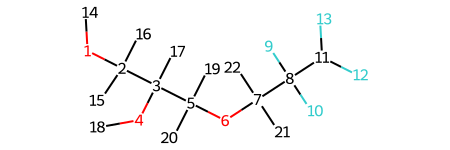

In [19]:
#使用同样的方法构建尾基团
tailgroup = meta.Molecule('OCC(O)COCC(F)(F)C(F)(F)', smiles=True)
tailgroup = Monomer(tailgroup, tail=11, remove_atoms=[23])
tailgroup.draw()

O9  is underbonded!
C0  is underbonded!
O9  is underbonded!
C0  is underbonded!
O9  is underbonded!


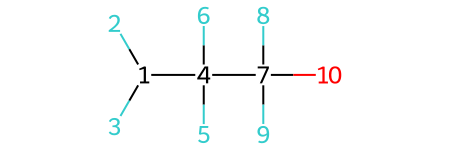

In [20]:
#构建重复单元
repunit = meta.Molecule('C(F)(F)C(F)(F)C(F)(F)O', smiles=True)
repunit = Monomer(repunit, head=1, tail=10, remove_atoms=[11, 12])
repunit.draw()

In [21]:
#组合成全氟聚醚分子
PFPE = Polymer(monomers=[repunit], name='PFPE', head=headgroup, tail=tailgroup)
#此例中，将重复单元N设置成3
PFPE.build(N=3)
PFPE.embed()
PFPE.view()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [22]:
#构建HDI体系，首先添加10个PFPE分子并分配分子力场参数
HDI_sys = meta.System(PFPE, 10, box=[40.0, 40.0, 40.0])
HDI_sys.parametrize(forcefield_name='gaff')

/home/yiqichen/anaconda3/envs/metamol_new/lib/python3.7/site-packages/foyer/forcefield.py:630: UserWarning: No force field version number found in force field XML file.
  "No force field version number found in force field XML file."
/home/yiqichen/anaconda3/envs/metamol_new/lib/python3.7/site-packages/foyer/forcefield.py:642: UserWarning: No force field name found in force field XML file.
  "No force field name found in force field XML file."
/home/yiqichen/anaconda3/envs/metamol_new/lib/python3.7/site-packages/foyer/forcefield.py:654: UserWarning: No combining rule found in force field XML file.
  "No combining rule found in force field XML file."
/home/yiqichen/anaconda3/envs/metamol_new/lib/python3.7/site-packages/foyer/validator.py:165: ValidationWarning: You have empty smart definition(s)
  warn("You have empty smart definition(s)", ValidationWarning)
/home/yiqichen/anaconda3/envs/metamol_new/lib/python3.7/site-packages/foyer/forcefield.py:455: UserWarning: Parameters have been a

In [23]:
#生成初始构象
HDI_sys.initial_config(region=(40.0, 40.0, 15.0))
HDI_sys.view()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [24]:
#构建磁盘表面模型
COC_surf = meta.Lattice(
        spacings=[3.567, 3.567, 3.567],
        langles=[90.0, 90.0, 90.0])
locations = [[0., 0., 0.], [0., 0.5, 0.5], 
            [0.5, 0, 0.5], [0.5, 0.5, 0.],
            [0.75, 0.75, 0.75], [0.75, 0.25, 0.25], 
            [0.25, 0.75, 0.25], [0.25, 0.25, 0.75]]

C = meta.Atom(symbol='C')
occupy_points = {C: locations}
COC_surf.clear()
COC_surf.occupy(occupy_points)
COC_surf.replicate(x=12, y=12, z=2)

In [25]:
#为磁盘表面模型分配力场参数         
from metamol.utils.ffobjects import AtomType
COC_atom = AtomType(name='coc_custom', atomic=6, symbol='C', sigma=3.39967, epsilon=0.086, mass=12.01)
COC_params = {'atom_type': [COC_atom]}
COC_surf.parametrize(custom=True, parameters=COC_params)

In [26]:
#搭建HDI全模型, 上下边缘皆放置一层COC
HDI_sys.append_surface(COC_surf, location='bottom')
HDI_sys.append_surface(COC_surf, location='top')
HDI_sys.view()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [28]:
#将HDI体系储存为lammps数据文件
HDI_sys.save('HDI.data')
#创建metaLammps对象来管理和运行lammps
from metamol.metaLammps import metaLammps
mlmp = metaLammps()

#读入lammps 指令文件并运行lammps
mlmp.file('HDI.in')
#当前案例中使用4个MPI processes在CPU上进行模拟。如需使用GPU模拟，可设定gpu=True，gpu库默认为kokkos，可通过gpu_backend='gpu'修改为gpu库。
mlmp.launch(out_file='out.dat', mpi=True, nprocs=4, gpu=False)

LAMMPS (23 Jun 2022 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
using 1 OpenMP thread(s) per MPI task
Reading data file ...
orthogonal box = (-1 -1 -7.24225) to (42.91225 42.91225 47.24225)
1 by 2 by 2 MPI processor grid
reading atoms ...
5358 atoms
scanning bonds ...
4 = max bonds/atom
scanning angles ...
6 = max angles/atom
scanning dihedrals ...
18 = max dihedrals/atom
reading bonds ...
740 bonds
reading angles ...
1360 angles
reading dihedrals ...
1960 dihedrals
Finding 1-2 1-3 1-4 neighbors ...
special bond factors lj:    0        0        0
special bond factors coul:  0        0        0
4 = max # of 1-2 neighbors
7 = max # of 1-3 neighbors
12 = max # of 1-4 neighbors
15 = max # of special neighbors
special bonds CPU = 0.005 seconds
read_data CPU = 0.073 seconds
Finding 1-2 1-3 1-4 neighbors ...
special bond fact

Text(0, 0.5, 'Temperature(K)')

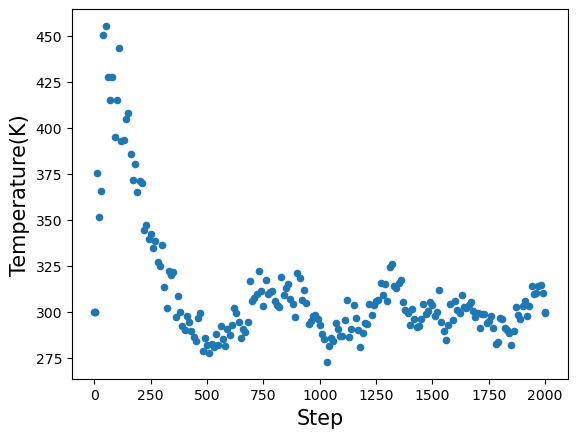

In [29]:
import matplotlib.pyplot as plt
#模拟数据读取和处理
#温度随步数的变化趋势
temp_out = mlmp.get_thermo('c_T')
temp_out.plot(x='Step', y='c_T', kind='scatter')
plt.xlabel('Step', fontsize=15)
plt.ylabel('Temperature(K)', fontsize=15)

Text(0, 0.5, 'Potential Energy(Kcal/mole)')

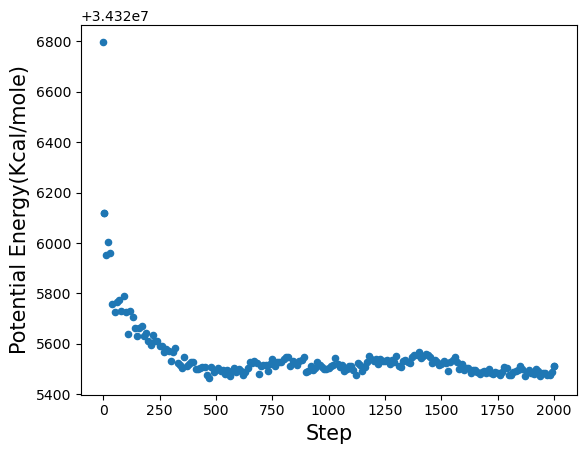

In [30]:
#体系势能随步数的变化趋势
pe_out = mlmp.get_thermo('PotEng')
pe_out.plot(x='Step', y='PotEng', kind='scatter')
plt.xlabel('Step', fontsize=15)
plt.ylabel('Potential Energy(Kcal/mole)', fontsize=15)

In [33]:
#删除metaLammps对象
mlmp.close()